In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df=pd.read_csv(r"C:\Users\Sudarshan\Documents\Usefl\emails.csv")
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [9]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [52]:
x=df.drop(['Email No.','Prediction'],axis=1)
y=df['Prediction']


<Axes: xlabel='Prediction', ylabel='count'>

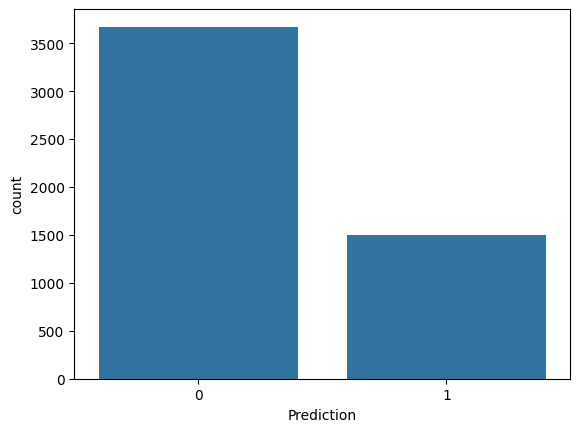

In [53]:
sns.countplot(x = y)

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit_transform(x)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
x_train.shape,y_train.shape

((4137, 3000), (4137,))

In [68]:
from sklearn import svm

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report

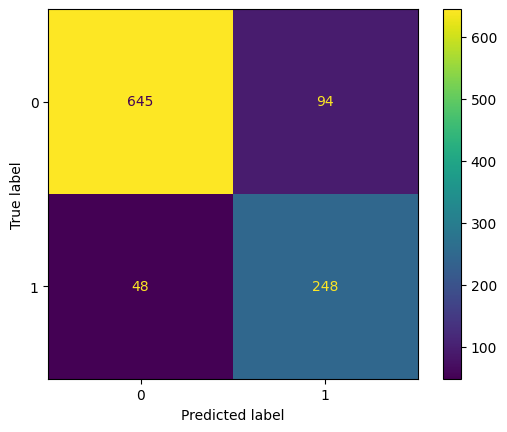

In [73]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn)

In [75]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       739
           1       0.73      0.84      0.78       296

    accuracy                           0.86      1035
   macro avg       0.83      0.86      0.84      1035
weighted avg       0.87      0.86      0.87      1035



In [76]:
from sklearn.svm import SVC

In [81]:
model=SVC(kernel='linear')

In [82]:
model.fit(x_train,y_train)
y_pred_svm=model.predict(x_test)

In [83]:
accuracy_score(y_test,y_pred_svm)

0.9594202898550724

In [ ]:
# Linear ,RBF,Poly,sigmoid